## Machine Learning Modelling 

In [1]:
import numpy as np # numpy is THE toolbox for scientific computing with python
import pandas as pd # pandas provides THE data structure and data analysis tools for data scientists 

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# seaborn plotting 
import seaborn as sns

In [2]:
data = pd.read_csv("../kaggle-data-sets/ai4i2020_prepared.csv")
data.head(4)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Power,temp_diff,Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,6951.590560,10.5,0,0,1
1,298.2,308.7,1408,46.3,3,0,6826.722724,10.5,0,1,0
2,298.1,308.5,1498,49.4,5,0,7749.387543,10.4,0,1,0
3,298.2,308.6,1433,39.5,7,0,5927.504659,10.4,0,1,0


## Machine Learning Model

Let us test `pycaret`https://pycaret.org/. From Google Gemini: *PyCaret is an open-source, low-code machine learning library written in Python. It's designed to automate machine learning workflows, making it easier and faster to build and deploy machine learning models. By automating tasks and streamlining the machine learning workflow, PyCaret can significantly reduce the time and effort required to build and deploy models. This allows data scientists to be more productive and focus on more strategic tasks.*

PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks, such as scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray, and a few more.

Here you find videos: https://www.youtube.com/channel/UCxA1YTYJ9BEeo50lxyI_B3g.

In [3]:
from pycaret.classification import *

In [4]:
s= setup(data, target = 'Machine failure', session_id = 42, data_split_stratify=True)

,Description,Value
0,Session id,42
1,Target,Machine failure
2,Target type,Binary
3,Original data shape,"(10000, 11)"
4,Transformed data shape,"(10000, 11)"
5,Transformed train set shape,"(7000, 11)"
6,Transformed test set shape,"(3000, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [5]:
best_model = compare_models(sort = 'AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9894,0.9804,0.7341,0.9412,0.8224,0.8171,0.8251,0.2350
lightgbm,Light Gradient Boosting Machine,0.9883,0.9747,0.7047,0.9348,0.7989,0.7931,0.8039,0.3060
xgboost,Extreme Gradient Boosting,0.9873,0.9712,0.7263,0.8789,0.7910,0.7846,0.7906,0.0210
rf,Random Forest Classifier,0.9887,0.9670,0.6879,0.9692,0.8033,0.7976,0.8108,0.1130
et,Extra Trees Classifier,0.9834,0.9554,0.5402,0.9564,0.6845,0.6768,0.7089,0.0460
ada,Ada Boost Classifier,0.9783,0.9511,0.5237,0.7652,0.6156,0.6050,0.6196,0.0540
lr,Logistic Regression,0.9720,0.9225,0.2821,0.7220,0.4032,0.3918,0.4389,0.4570
ridge,Ridge Classifier,0.9680,0.9098,0.0553,0.7000,0.1010,0.0982,0.1885,0.0080
lda,Linear Discriminant Analysis,0.9630,0.9098,0.4042,0.4501,0.4233,0.4043,0.4063,0.0070
nb,Naive Bayes,0.9594,0.8894,0.4466,0.4105,0.4267,0.4058,0.4067,0.0060


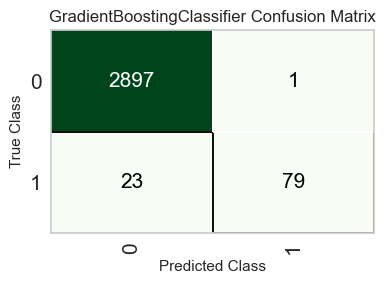

In [6]:
plt.figure(figsize = (4,3))
plot_model(best_model, plot = 'confusion_matrix')

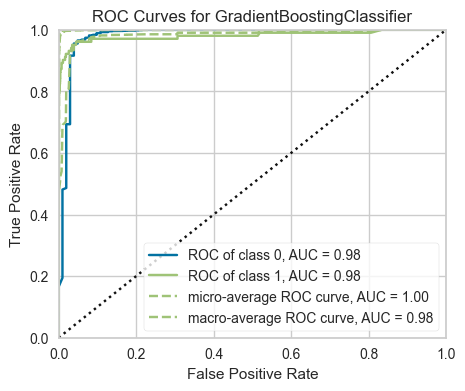

In [7]:
plt.figure(figsize = (5,4))
plot_model(best_model, plot = 'auc')

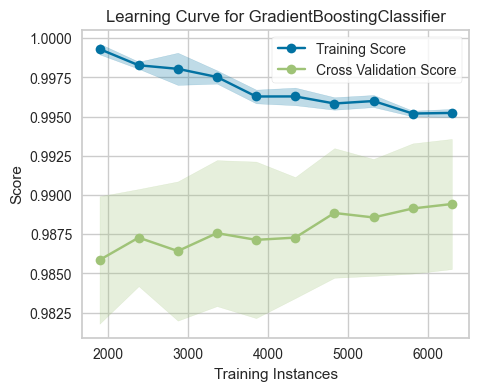

In [8]:
plt.figure(figsize = (5, 4))
plot_model(best_model, plot = 'learning')

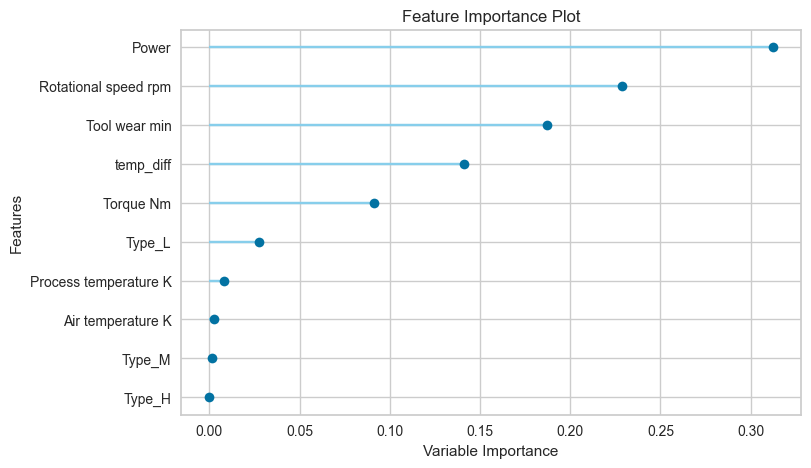

In [9]:
# plot feature importance
plot_model(best_model, plot = 'feature')

In [10]:
save_model(best_model, "../kaggle-data-sets/ai4i2020_pycaret_model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Air temperature [K]',
                                              'Process temperature [K]',
                                              'Rotational speed [rpm]',
                                              'Torque [Nm]', 'Tool wear [min]',
                                              'Power', 'temp_diff', 'Type_H',
                                              'Type_L', 'Type_M'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               m...
                                   

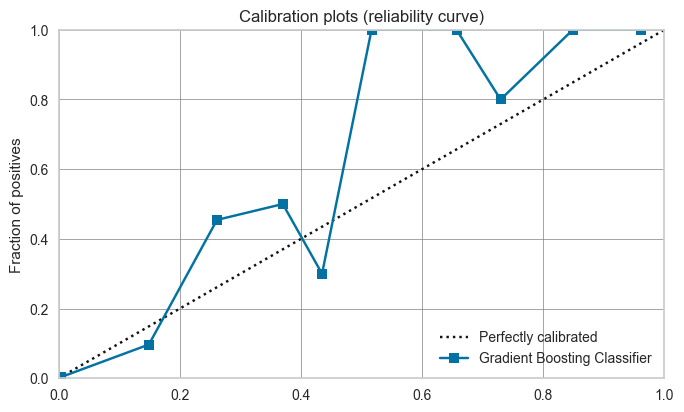

In [10]:
# check calbiration of default dt
plot_model(best_model, plot = 'calibration')

In [11]:
calibrated_model = calibrate_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9843,0.9414,0.6522,0.8333,0.7317,0.7237,0.7295
1,0.9929,0.9932,0.7826,1.0000,0.8780,0.8744,0.8814
2,0.9871,0.9759,0.7826,0.8182,0.8000,0.7934,0.7936
3,0.9900,0.9911,0.7083,1.0000,0.8293,0.8243,0.8373
4,0.9886,0.9703,0.6667,1.0000,0.8000,0.7944,0.8117
5,0.9943,0.9966,0.8333,1.0000,0.9091,0.9062,0.9102
6,0.9914,0.9966,0.7917,0.9500,0.8636,0.8592,0.8631
7,0.9900,0.9915,0.7500,0.9474,0.8372,0.8321,0.8382
8,0.9929,0.9942,0.7917,1.0000,0.8837,0.8801,0.8865


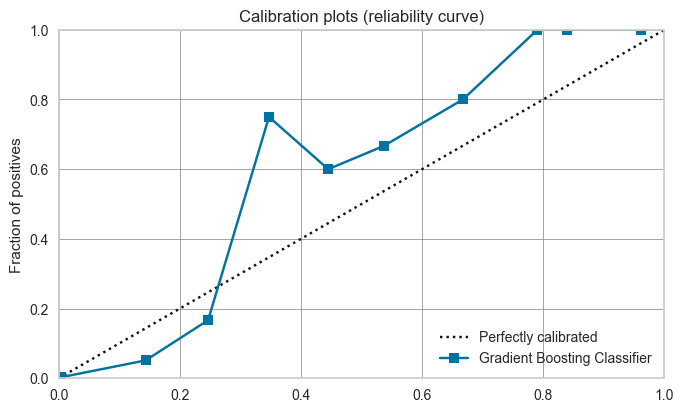

In [12]:
# check calbiration of calibrated dt
plot_model(calibrated_model, plot = 'calibration')

In [13]:
automl()

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [14]:
# create gradio app
create_app(best_model)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
